In [1]:
import numpy as np
import pandas as pd
import os
import PIL
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn, optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
path = os.path.join('data', 'train_sets', '*', '*.jpg')
fname = glob(path)

fname

['data/train_sets/beras_kutah/38.jpg',
 'data/train_sets/beras_kutah/101.jpg',
 'data/train_sets/beras_kutah/8.jpg',
 'data/train_sets/beras_kutah/20.jpg',
 'data/train_sets/beras_kutah/88.jpg',
 'data/train_sets/beras_kutah/132.jpg',
 'data/train_sets/beras_kutah/117.jpg',
 'data/train_sets/beras_kutah/80.jpg',
 'data/train_sets/beras_kutah/138.jpg',
 'data/train_sets/beras_kutah/10.jpg',
 'data/train_sets/beras_kutah/122.jpg',
 'data/train_sets/beras_kutah/26.jpg',
 'data/train_sets/beras_kutah/18.jpg',
 'data/train_sets/beras_kutah/21.jpg',
 'data/train_sets/beras_kutah/74.jpg',
 'data/train_sets/beras_kutah/30.jpg',
 'data/train_sets/beras_kutah/99.jpg',
 'data/train_sets/beras_kutah/16.jpg',
 'data/train_sets/beras_kutah/37.jpg',
 'data/train_sets/beras_kutah/129.jpg',
 'data/train_sets/beras_kutah/57.jpg',
 'data/train_sets/beras_kutah/39.jpg',
 'data/train_sets/beras_kutah/76.jpg',
 'data/train_sets/beras_kutah/45.jpg',
 'data/train_sets/beras_kutah/66.jpg',
 'data/train_sets/be

In [4]:
# label = []
# for fn in fname :
#     fn = fn.split("/")[2]
#     label.append(fn)

In [5]:
label = [fn.split("/")[-2] for fn in fname]
label

['beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_

In [6]:
images = [fn.split("/")[-1] for fn in fname]
images

['38.jpg',
 '101.jpg',
 '8.jpg',
 '20.jpg',
 '88.jpg',
 '132.jpg',
 '117.jpg',
 '80.jpg',
 '138.jpg',
 '10.jpg',
 '122.jpg',
 '26.jpg',
 '18.jpg',
 '21.jpg',
 '74.jpg',
 '30.jpg',
 '99.jpg',
 '16.jpg',
 '37.jpg',
 '129.jpg',
 '57.jpg',
 '39.jpg',
 '76.jpg',
 '45.jpg',
 '66.jpg',
 '75.jpg',
 '96.jpg',
 '67.jpg',
 '70.jpg',
 '118.jpg',
 '13.jpg',
 '69.jpg',
 '56.jpg',
 '81.jpg',
 '34.jpg',
 '59.jpg',
 '62.jpg',
 '5.jpg',
 '106.jpg',
 '24.jpg',
 '123.jpg',
 '91.jpg',
 '136.jpg',
 '58.jpg',
 '43.jpg',
 '143.jpg',
 '14.jpg',
 '103.jpg',
 '9.jpg',
 '31.jpg',
 '41.jpg',
 '112.jpg',
 '33.jpg',
 '17.jpg',
 '22.jpg',
 '47.jpg',
 '28.jpg',
 '72.jpg',
 '32.jpg',
 '89.jpg',
 '6.jpg',
 '84.jpg',
 '130.jpg',
 '141.jpg',
 '71.jpg',
 '65.jpg',
 '104.jpg',
 '77.jpg',
 '29.jpg',
 '124.jpg',
 '139.jpg',
 '92.jpg',
 '79.jpg',
 '85.jpg',
 '115.jpg',
 '83.jpg',
 '73.jpg',
 '95.jpg',
 '7.jpg',
 '46.jpg',
 '54.jpg',
 '114.jpg',
 '78.jpg',
 '98.jpg',
 '64.jpg',
 '35.jpg',
 '128.jpg',
 '60.jpg',
 '27.jpg',
 '105

In [7]:
labels = np.unique(label)
ints = np.arange(0, len(labels))
dicts = dict(zip(labels, ints))

dicts

{'beras_kutah': 0,
 'gajah_oling': 1,
 'gedegan': 2,
 'kopi_pecah': 3,
 'moto_pitik': 4,
 'paras_gempal': 5,
 'sisikan': 6}

In [8]:
df_batik = pd.DataFrame({"image_id":images,"label":label})

#check image files
index = []
path = path[:-7]
for i in range(len(df_batik)) :
    try :
        Image.open(path + str(df_batik["label"][i]) + '/' + str(df_batik["image_id"][i]))
        pass
    except PIL.UnidentifiedImageError:
        index.append(i)

df = df_batik.drop(index)
df.head()

,image_id,label
0,38.jpg,beras_kutah
1,101.jpg,beras_kutah
2,8.jpg,beras_kutah
3,20.jpg,beras_kutah
4,88.jpg,beras_kutah


## Plot images

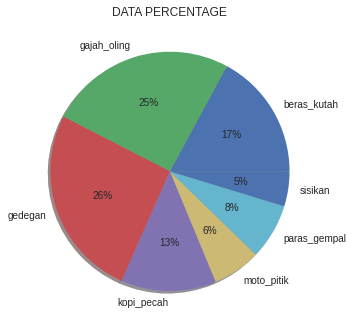

In [9]:
target, count = np.unique(df['label'], return_counts=True)
precentange = [x / np.sum(count) for x in count]
plt.style.use('seaborn')
plt.pie(precentange, labels = target,  autopct='%1.f%%', shadow=True)
plt.title('DATA PERCENTAGE')
plt.show()

## Datasets dan dataloader

In [10]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [11]:
class Batik(Dataset) :
    def __init__(self, x, y, path, map_label = dicts, transform=None) :
        super().__init__()
        self.X = x
        self.y = y
        self.path = path
        self.map_label = map_label
        self.transform = transform
    
    def __getitem__(self, idx) :
        img = Image.open(path + str(self.y[idx]) + '/' + str(self.X[idx])).convert("RGB")
        label = self.map_label[self.y[idx]]
        
        if self.transform is not None :
            img = self.transform(img)
        
        return img, label
    
    def __len__(self) :
        return len(self.X)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df["image_id"].values
y = df["label"].values

# train data, validation data, test data
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y , test_size=0.15, shuffle=True, 
                                                          stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval , test_size=0.15, shuffle=True, 
                                                          stratify=y_trainval, random_state=42)


len(X_train), len(X_val), len(X_test)

(612, 108, 128)

In [14]:
#DATALOADER
bath_size = 32
crop_size = 128

#pipeline data augmentation 
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(crop_size, scale=(0.8, 1.0)),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(0, shear=(10)),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.Resize(135),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
])

train_set = Batik(X_train, y_train, path, transform=train_transform)
val_set = Batik(X_val, y_val, path, transform=val_transform)

# use pytorch for dataloader
train_loader = DataLoader(train_set, batch_size=bath_size, shuffle=True, 
                          num_workers=4, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=bath_size, shuffle=True, 
                        num_workers=4, pin_memory=True)

### Cek 

In [15]:
import random

beras_kutah


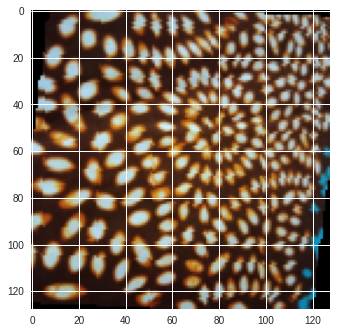

In [16]:
int_label = dict(zip(ints, labels))


img, label = train_set[random.randint(0, len(X_train))]
plt.imshow(img.permute(1,2,0));
print(int_label[label])

## model architecture

In [17]:
class CNN(nn.Module) :
    def __init__(self) :
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        self.fc = nn.Sequential(
            nn.Linear(in_features=2048, out_features=1024),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=7),
            nn.LogSoftmax()
        )
    def foward(self, x) :
        x = self.conv(x)
        x = self.fc(x)
        return x
        

## Training preperation

In [18]:
from torch import optim
from tqdm.auto import tqdm

In [19]:
lr = 0.001

model = CNN().to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr= lr)

In [23]:
#function looping
def looping(mode, dataset, dataloader, criterion, optimizer, device) :
    if mode =="train" :
        model.train()
    
    elif mode =="eval" :
        model.eval()
    
    for image, label in tqdm(dataloader, desc=mode.title()) :
        image = image.to(device)
        label = label.to(device)
        output = model(image)
        loss = criterion(output, label)
        
        if mode =="train" :
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * image.shape(0)
        correct += (output.argmax(1) == label).sum().item()
        
    cost = cost / len(dataset)
    correct = correct / len(dataset)
    
    return cost, correct

In [ ]:
#test

epoch = 10
train_